# Importando bibliotecas e dataset

Resumo: Importei as bibliotecas fundamentais para converter em tabela, realizar operações matemáticas se preciso, e plotar os gráficos, também importei o conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados/BankChurners.csv', sep=',')

# Tratando dados

Resumo: removi duas colunas do DataFrame e procurei por dados nulos, nenhum foi encontrado

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
clientes = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)


# na coluna Gender, homem = 0, mulher = 1
# na coluna Attrition_flag, sem_atrito = 0, com_atrito = 1

In [5]:
clientes.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
print('A quantidade de dados é {}'.format(clientes.shape))

A quantidade de dados é (10127, 21)


In [7]:
print('A quantidade de dados nulos é {}'.format(clientes.isna().sum().sum()))

A quantidade de dados nulos é 0


# Análises 

Resumo: investiguei as estatísticas dos clientes para buscar algum comportamento estranho, mas não encontrei nada que determinaria há existência atrito, então plotei alguns gráficos para entender quem são nossos clientes, e outros para entender o perfil deles no banco, não encontrei grandes diferenças entre os que tinham atrito e os que não. Então separei nosso DataFrame entre clientes com atrito e clientes sem atrito e percebi uma diferença no Total Revolving Balance, como a diferença é muito sútil parti para o Machine Learning para encontrar respostas

In [8]:
clientes.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


In [9]:
clientes.corr().round(4)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.0000,0.0076,0.0068,0.1346,0.0069,0.0057,0.0057,0.0057,0.0008,0.0056,0.0174,-0.0197,-0.0030,0.0077,0.0003
Customer_Age,0.0076,1.0000,-0.1223,0.7889,-0.0109,0.0544,-0.0185,0.0025,0.0148,0.0012,-0.0620,-0.0464,-0.0671,-0.0121,0.0071
Dependent_count,0.0068,-0.1223,1.0000,-0.1031,-0.0391,-0.0108,-0.0405,0.0681,-0.0027,0.0683,-0.0354,0.0250,0.0499,0.0111,-0.0371
Months_on_book,0.1346,0.7889,-0.1031,1.0000,-0.0092,0.0742,-0.0108,0.0075,0.0086,0.0067,-0.0490,-0.0386,-0.0498,-0.0141,-0.0075
Total_Relationship_Count,0.0069,-0.0109,-0.0391,-0.0092,1.0000,-0.0037,0.0552,-0.0714,0.0137,-0.0726,0.0501,-0.3472,-0.2419,0.0408,0.0677
Months_Inactive_12_mon,0.0057,0.0544,-0.0108,0.0742,-0.0037,1.0000,0.0295,-0.0204,-0.0422,-0.0166,-0.0322,-0.0370,-0.0428,-0.0390,-0.0075
Contacts_Count_12_mon,0.0057,-0.0185,-0.0405,-0.0108,0.0552,0.0295,1.0000,0.0208,-0.0539,0.0256,-0.0244,-0.1128,-0.1522,-0.0950,-0.0555
Credit_Limit,0.0057,0.0025,0.0681,0.0075,-0.0714,-0.0204,0.0208,1.0000,0.0425,0.9960,0.0128,0.1717,0.0759,-0.0020,-0.4830
Total_Revolving_Bal,0.0008,0.0148,-0.0027,0.0086,0.0137,-0.0422,-0.0539,0.0425,1.0000,-0.0472,0.0582,0.0644,0.0561,0.0899,0.6240
Avg_Open_To_Buy,0.0056,0.0012,0.0683,0.0067,-0.0726,-0.0166,0.0256,0.9960,-0.0472,1.0000,0.0076,0.1659,0.0709,-0.0101,-0.5388


In [10]:
clientes.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
# personalizadno o gráfico

sns.set_theme(palette='pastel', style='darkgrid')

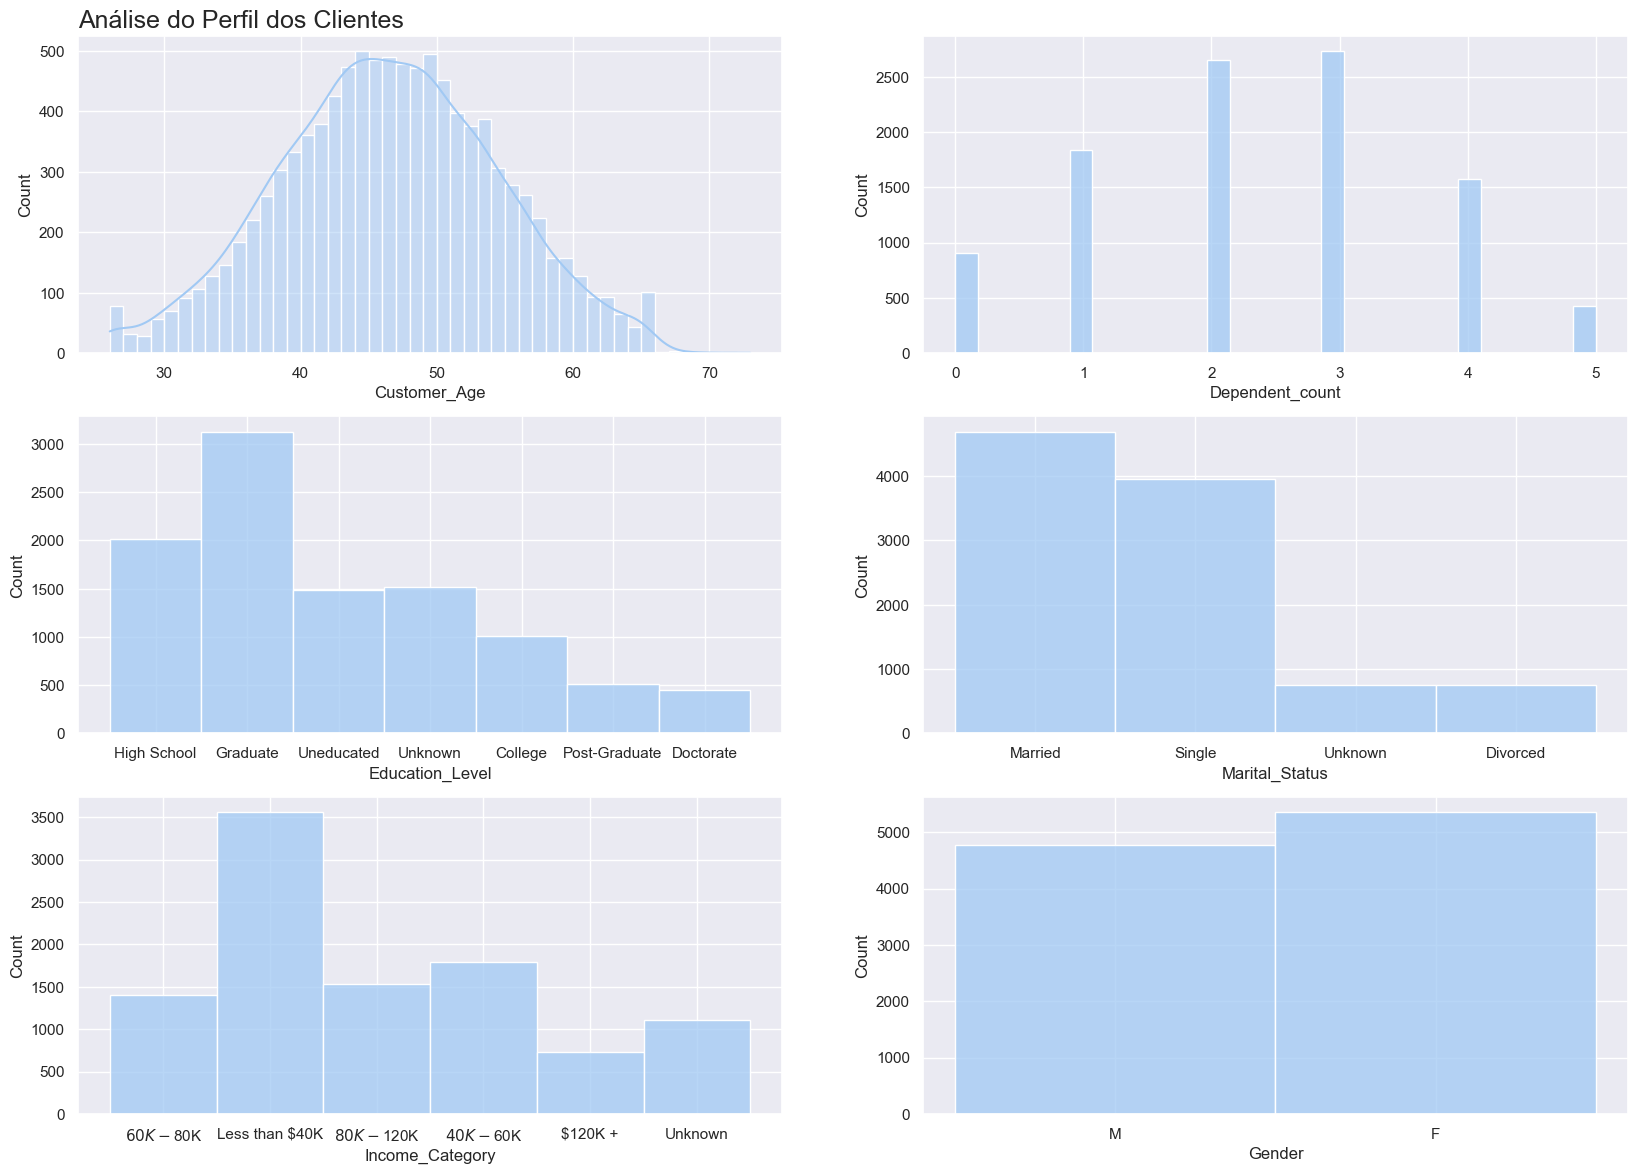

In [12]:
plt.figure(figsize=(20,14))

ax = plt.subplot(3,2,1)
ax.set_title('Análise do Perfil dos Clientes',fontsize=18, loc='left')
sns.histplot(x = 'Customer_Age', data = clientes, kde=True)
plt.subplot(3,2,2)
sns.histplot(x = 'Dependent_count', data = clientes)
plt.subplot(3,2,3)
sns.histplot(x = 'Education_Level', data = clientes)
plt.subplot(3,2,4)
sns.histplot(x = 'Marital_Status', data = clientes)
plt.subplot(3,2,5)
sns.histplot(x = 'Income_Category', data = clientes)
plt.subplot(3,2,6)
sns.histplot(x = 'Gender', data = clientes)

ax=ax
plt.show()

In [13]:
clientes.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


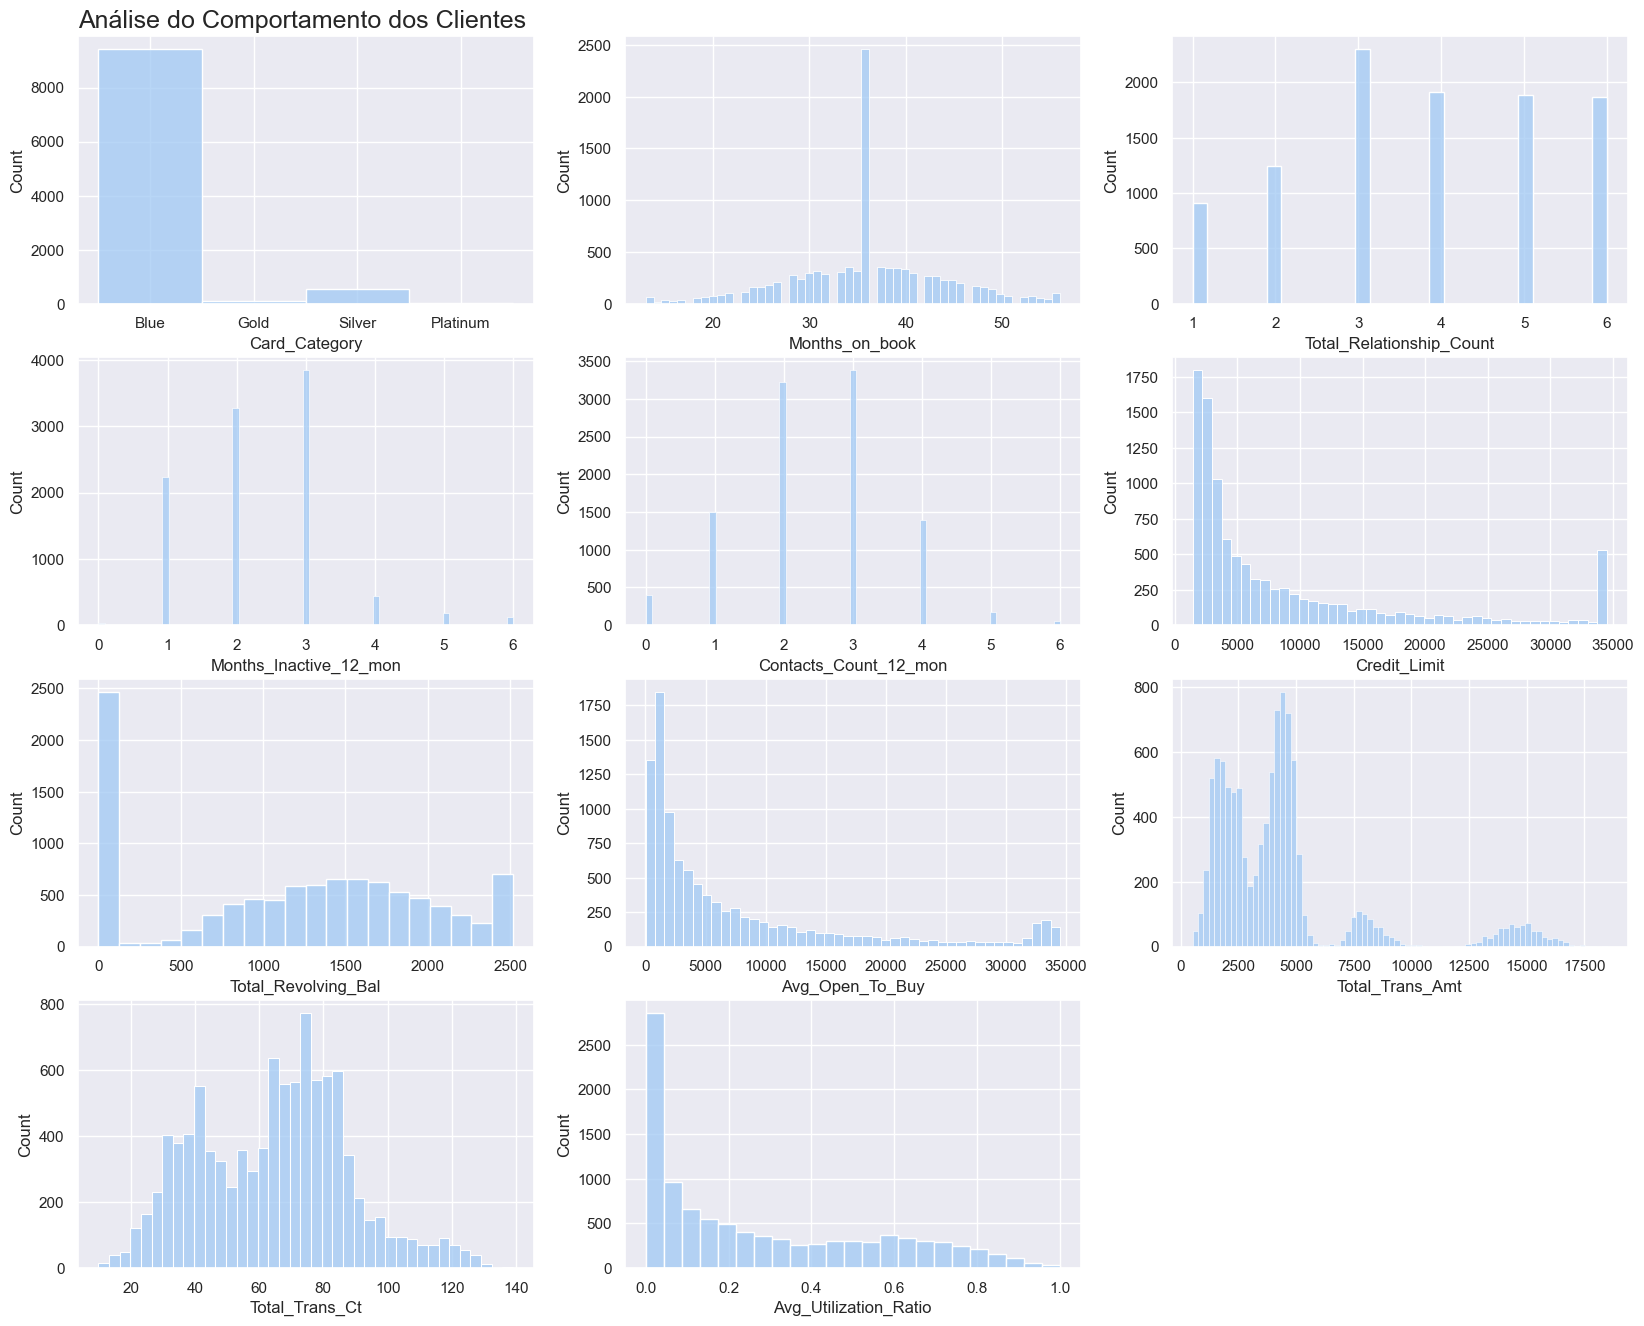

In [14]:
plt.figure(figsize=(20,16))

ax = plt.subplot(4,3,1)
ax.set_title('Análise do Comportamento dos Clientes',fontsize=18, loc='left')
sns.histplot(x = 'Card_Category', data = clientes)
plt.subplot(4,3,2)
sns.histplot(x = 'Months_on_book', data = clientes)
plt.subplot(4,3,3)
sns.histplot(x = 'Total_Relationship_Count', data = clientes)
plt.subplot(4,3,4)
sns.histplot(x = 'Months_Inactive_12_mon', data = clientes)
plt.subplot(4,3,5)
sns.histplot(x = 'Contacts_Count_12_mon', data = clientes)
plt.subplot(4,3,6)
sns.histplot(x = 'Credit_Limit', data = clientes)
plt.subplot(4,3,7)
sns.histplot(x = 'Total_Revolving_Bal', data = clientes)
plt.subplot(4,3,8)
sns.histplot(x = 'Avg_Open_To_Buy', data = clientes)
plt.subplot(4,3,9)
sns.histplot(x = 'Total_Trans_Amt', data = clientes)
plt.subplot(4,3,10)
sns.histplot(x = 'Total_Trans_Ct', data = clientes)
plt.subplot(4,3,11)
sns.histplot(x = 'Avg_Utilization_Ratio', data = clientes)

ax=ax
plt.show()

## Separando os clientes pela classificação de atrito

In [15]:
clientes.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [16]:
clientes['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [17]:
com_atrito = clientes[clientes['Attrition_Flag']=='Attrited Customer']

In [18]:
sem_atrito = clientes[clientes['Attrition_Flag']=='Existing Customer']

In [19]:
com_atrito.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00,1627.00
mean,7.352614e+08,46.66,2.40,36.18,3.28,2.69,2.97,8136.04,672.82,7463.22,0.69,3095.03,44.93,0.55,0.16
std,3.557725e+07,7.67,1.28,7.80,1.58,0.90,1.09,9095.33,921.39,9109.21,0.21,2308.23,14.57,0.23,0.26
min,7.080833e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.123713e+08,41.00,2.00,32.00,2.00,2.00,2.00,2114.00,0.00,1587.00,0.54,1903.50,37.00,0.40,0.00
50%,7.165644e+08,47.00,2.00,36.00,3.00,3.00,3.00,4178.00,0.00,3488.00,0.70,2329.00,43.00,0.53,0.00
75%,7.683737e+08,52.00,3.00,40.00,5.00,3.00,4.00,9933.50,1303.50,9257.50,0.86,2772.00,51.00,0.69,0.23
max,8.282949e+08,68.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,1.49,10583.00,94.00,2.50,1.00


In [20]:
sem_atrito.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00,8500.00
mean,7.399272e+08,46.26,2.34,35.88,3.91,2.27,2.36,8726.88,1256.60,7470.27,0.77,4654.66,68.67,0.74,0.30
std,3.710723e+07,8.08,1.30,8.02,1.53,1.02,1.08,9084.97,757.75,9087.67,0.22,3512.77,22.92,0.23,0.27
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,15.00,0.26,816.00,11.00,0.03,0.00
25%,7.132197e+08,41.00,1.00,31.00,3.00,1.00,2.00,2602.00,800.00,1184.50,0.64,2384.75,54.00,0.62,0.06
50%,7.181643e+08,46.00,2.00,36.00,4.00,2.00,2.00,4643.50,1364.00,3469.50,0.74,4100.00,71.00,0.72,0.21
75%,7.783415e+08,52.00,3.00,40.00,5.00,3.00,3.00,11252.75,1807.00,9978.25,0.86,4781.25,82.00,0.83,0.53
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,5.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,0.99


# Machine Learning

Resumo: Separei o DataFrame clientes para teste e treino, defini uma seed para estabelecer um padrão de aleatorização na coleta de dados, testei os modelos LinearSVC, e o SVC, mas ao comparar com o modelo Dummy (esse modelo faz a previsão chutando todas as respostas), notei que a acúracia era a mesma, investigando a documentação encontrei o modelo DecissionTreeClassifier que realiza pequenas decisões para realizar inferências sobre o conjunto de dados, e esse modelo teve a acurácia muito superior aos outros, optei por continuar com ele e plotei um gráfico para entender como a máquina estava tomando decisões, coloquei a profudindade máxima da árvore em 4, apenas para facilitar na visualização, mas podemos remover o limite ao tirar o parâmetro max_depth

In [21]:
# as mudanças dos valores abaixo são feitas para que colunas que antes estavam em string passem a ser consideradas como números e utilizadas como variáveis explicativas

map1 = {'Existing Customer':0, 'Attrited Customer':1} 
clientes['Attrition_Flag'] = clientes['Attrition_Flag'].map(map1)

gen = {'M':0, 'F':1}
clientes['Gender'] = clientes['Gender'].map(gen)

cc = {'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4}
clientes['Card_Category'] = clientes['Card_Category'].map(cc)

ic = {'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
clientes['Income_Category'] = clientes['Income_Category'].map(ic)

mudei algumas colunas a para int atribuindo um valor para conseguir usar como variável no modelo de ml

In [22]:
X = clientes.drop(columns=['Attrition_Flag', 'Education_Level', 'Marital_Status'], axis=1)
y = clientes['Attrition_Flag']

## Importando bibliotecas de Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [24]:
np.random.seed(20) # utilizei o random seed do numpy para padronizar o random_state do sklearn

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 2/3, stratify=y)

## Criando o modelo

In [26]:
model = LinearSVC(dual=False)
model.fit(X_train, y_train)
previsao =model.predict(X_test)
accuracy_score(y_test, previsao)
print('A acurácia do LinearSVC foi {}%'.format(((accuracy_score(y_test, previsao))*100).round(2)))

A acurácia do LinearSVC foi 83.93%


In [27]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
ac_stra = dummy.score(X_test, y_test)
print('A acurácia do dummy stratified foi {}%'.format(((ac_stra)*100).round(2)))

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
ac_most = dummy.score(X_test, y_test)
print('A acurácia do dummy most_frequent foi {}%'.format(((ac_most)*100).round(2)))

A acurácia do dummy stratified foi 73.03%
A acurácia do dummy most_frequent foi 83.93%


O primeiro modelo que criei é o linearSVC, a acurácia dele parece alta, mas ao fazer o dummy teste (o dummy teste é como chutar os valores) percebi que o resultado é o mesmo, por isso surge a necessidade de encontrar um modelo melhor

In [28]:
model = SVC()
model.fit(X_train, y_train)
previsao =model.predict(X_test)
accuracy_score(y_test, previsao)
print('A acurácia do SVC foi {}%'.format(((accuracy_score(y_test, previsao))*100).round(2)))

A acurácia do SVC foi 83.93%


o mesmo comportamento acontece com o SVC, que é mais genérico, resolvi consultar a documentação para encontrar outro modelo, enquanto o SVC e o LinearSVC observam o comportamento da variação da variável explicativa na dapendente, o decission tree - modelo que decidi testar - realiza pequenas decisões baseadas nos dados para fazer inferências

In [29]:
model_final = DecisionTreeClassifier(max_depth=4)
model_final.fit(X_train, y_train)
previsao =model_final.predict(X_test)
accuracy_score(y_test, previsao)
print('A acurácia do DecissionTreeClassifier foi {}%'.format(((accuracy_score(y_test, previsao))*100).round(2)))

A acurácia do DecissionTreeClassifier foi 92.06%


A acurácia da árvore de decisão foi muito melhor do que os modelos anteriores e o dummy, por esse motivo irei usar ele

Visualizando como as decisões são feitas

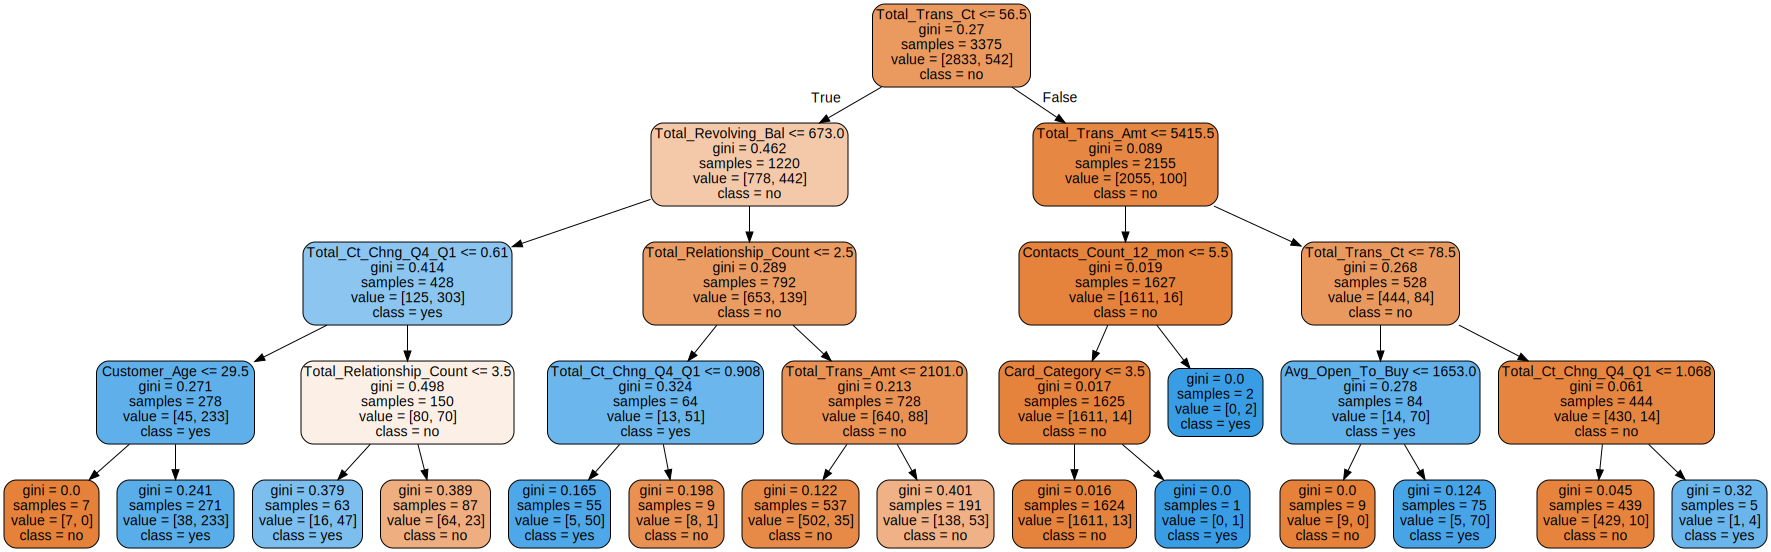

In [30]:
dot_data = export_graphviz(model_final, feature_names= X.columns, filled=True, rounded=True, class_names=['no', 'yes'])
grafico = graphviz.Source(dot_data)
grafico


# Resultados

Resumo: comparando a previsão com o y_test, observei que 6216 dos 6752 valores estão corretos, apenas 536 não coincidiram, criei uma nova tabela para expressar os resultados

In [31]:
comparando_resultado = pd.DataFrame(y_test)
comparando_resultado['Predicted_Attrition_Flag']=previsao
comparando_resultado.rename(columns={'Attrition_Flag':'Real_Attrition_Flag'}, inplace=True)
comparando_resultado

,Real_Attrition_Flag,Predicted_Attrition_Flag
8123,1,1
7293,0,0
4871,0,0
2779,0,0
9883,1,1
...,...,...
9416,1,1
538,0,0
7820,0,0
7442,1,1


In [32]:
(y_test==previsao).value_counts()

True     6216
False     536
Name: Attrition_Flag, dtype: int64

Acima podemos ver a quantidade de valores que coincidem e a quantidade dos que não 

In [33]:
X_test['Real_Attrition_Flag'] = y_test

In [34]:
X_test['Predicted_Attrition_Flag'] = previsao

In [35]:
X_test

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Real_Attrition_Flag,Predicted_Attrition_Flag
8123,719821908,38,1,2,1,1,16,2,1,2,2703.0,0,2703.0,0.882,2752,43,0.433,0.000,1,1
7293,710243208,56,1,4,1,1,44,3,3,2,1707.0,0,1707.0,0.683,4846,80,0.569,0.000,0,0
4871,708442158,51,1,1,0,1,38,3,2,4,6182.0,1516,4666.0,1.137,3801,61,0.968,0.245,0,0
2779,780416433,38,0,2,1,1,25,4,1,3,8740.0,734,8006.0,1.072,2169,38,0.652,0.084,0,0
9883,715671183,43,0,3,4,1,31,6,3,4,6824.0,2517,4307.0,0.972,9045,67,0.595,0.369,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,714391683,39,0,4,3,2,36,4,3,2,34516.0,2517,31999.0,0.841,8248,66,0.650,0.073,1,1
538,711622683,48,0,4,3,1,30,4,3,3,7712.0,1387,6325.0,0.861,1597,39,0.560,0.180,0,0
7820,709641933,42,1,3,2,1,36,3,1,2,3433.0,1869,1564.0,0.838,4504,84,0.787,0.544,0,0
7442,714408933,44,0,4,4,1,36,4,2,2,10834.0,0,10834.0,0.522,2249,51,0.594,0.000,1,1


In [36]:
map1 = {0:'Existing Customer', 1:'Attrited Customer'} 
X_test['Real_Attrition_Flag'] = X_test['Real_Attrition_Flag'].map(map1)

X_test['Predicted_Attrition_Flag'] = X_test['Predicted_Attrition_Flag'].map(map1)

gen = {0:'M', 1:'F'}
X_test['Gender'] = X_test['Gender'].map(gen)

cc = {1:'Blue', 2:'Gold', 3:'Silver', 4:'Platinum'}
X_test['Card_Category'] = X_test['Card_Category'].map(cc)

ic = {0:'Unknown', 1:'Less than $40K', 2:'$40K - $60K', 3:'$60K - $80K', 4:'$80K - $120K', 5:'$120K +'}
X_test['Income_Category'] = X_test['Income_Category'].map(ic)

In [37]:
X_test.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Real_Attrition_Flag', 'Predicted_Attrition_Flag'],
      dtype='object')

In [38]:
X_test = X_test[[
        'CLIENTNUM', 'Real_Attrition_Flag', 'Predicted_Attrition_Flag', 
        'Customer_Age', 'Gender', 'Dependent_count',
        'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio' ]]

In [39]:
X_test

,CLIENTNUM,Real_Attrition_Flag,Predicted_Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8123,719821908,Attrited Customer,Attrited Customer,38,F,2,Less than $40K,Blue,16,2,1,2,2703.0,0,2703.0,0.882,2752,43,0.433,0.000
7293,710243208,Existing Customer,Existing Customer,56,F,4,Less than $40K,Blue,44,3,3,2,1707.0,0,1707.0,0.683,4846,80,0.569,0.000
4871,708442158,Existing Customer,Existing Customer,51,F,1,Unknown,Blue,38,3,2,4,6182.0,1516,4666.0,1.137,3801,61,0.968,0.245
2779,780416433,Existing Customer,Existing Customer,38,M,2,Less than $40K,Blue,25,4,1,3,8740.0,734,8006.0,1.072,2169,38,0.652,0.084
9883,715671183,Attrited Customer,Attrited Customer,43,M,3,$80K - $120K,Blue,31,6,3,4,6824.0,2517,4307.0,0.972,9045,67,0.595,0.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9416,714391683,Attrited Customer,Attrited Customer,39,M,4,$60K - $80K,Gold,36,4,3,2,34516.0,2517,31999.0,0.841,8248,66,0.650,0.073
538,711622683,Existing Customer,Existing Customer,48,M,4,$60K - $80K,Blue,30,4,3,3,7712.0,1387,6325.0,0.861,1597,39,0.560,0.180
7820,709641933,Existing Customer,Existing Customer,42,F,3,$40K - $60K,Blue,36,3,1,2,3433.0,1869,1564.0,0.838,4504,84,0.787,0.544
7442,714408933,Attrited Customer,Attrited Customer,44,M,4,$80K - $120K,Blue,36,4,2,2,10834.0,0,10834.0,0.522,2249,51,0.594,0.000


# Salvando o modelo para análises futuras

In [40]:
import pickle

In [41]:
output = open('prevendo_churn', 'wb')
pickle.dump(model_final, output)
output.close()